<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-6-Image-Processing/blob/main/TNT_Project_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
import scipy.ndimage as ndi
import sys
import keras.utils as image
from tensorflow.keras.utils import load_img
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
unlabeled_image = cv2.imread('/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png')
#unlabeled_image.dtype

In [4]:
#Apply Filters

In [5]:
#Rolling Ball Algorithm : to remove uneven backgrounds or smooth the intensity variations in an image
# where the image may have uneven lighting or background artifacts

In [6]:
import cv2
import numpy as np

def background_and_shading_correction(image, ball_radius):
    # Convert the image to grayscale, rolling ball algorithm is usually applied to grayscale images.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the rolling ball algorithm for background correction
    #The kernel_size is set to be twice the ball_radius plus one.
    #The "+1" ensures that the kernel has an odd size, which is a requirement for morphological operations.
    kernel_size = ball_radius * 2 + 1
    background_corrected = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)))

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image

# Load your input image
input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

# Set the radius for the rolling ball algorithm (adjust as needed)
ball_radius = 50

# Perform background and shading correction
output_image = background_and_shading_correction(input_image, ball_radius)

# Save the processed image (replace "output_image.jpg" with the desired output path)
cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_rolling_ball_50.png", output_image)



True

In [7]:
import cv2

def background_and_shading_correction(image, sigma):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Gaussian filter for background correction
    background_corrected = cv2.GaussianBlur(gray_image, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Perform shading correction by subtracting the background corrected image from the original image
    shading_corrected = cv2.subtract(gray_image, background_corrected)

    # Convert the shading corrected image back to color (optional)
    shading_corrected_color = cv2.cvtColor(shading_corrected, cv2.COLOR_GRAY2BGR)

    # Combine the shading-corrected image with the original image to get the final result
    result_image = cv2.addWeighted(image, 1, shading_corrected_color, 0.7, 0)

    return result_image


# Load input image
input_image = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05.png")

# Set the sigma value for the Gaussian filter (adjust as needed)
sigma = 3

# Perform background and shading correction
output_image = background_and_shading_correction(input_image, sigma)

# Save the processed image (replace "output_image.jpg" with the desired output path)
cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_gaussian.png", output_image)


True

In [8]:
#Step 1:Read and Slice the Preprocessed Image
#Step 1.1: Slice the unlabel image in the steps of region size

In [9]:
img_preprocessed = cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/output_image_rolling_ball_50.png")

#Set the region size
region_size = 512

#Get the dimensions of the image
height, width, channels = img_preprocessed.shape

#Iterate through the image in the steps of region_size
for y in range(0,height,region_size):
  for x in range (0,width,region_size):
    #Extract the region
    region = img_preprocessed[y:y+region_size,x:x+region_size]

    #Label the image based on the coordinates
    image_name = 'IMG' + '_'+ str(y) + '_' + str(x)

    #Create the image
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_unlabeled_images/" + image_name + ".png", region)

In [10]:
#Step 1.2: Slice the labeled image in the steps of region_size

In [11]:
img_labeled =  cv2.imread("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/m05-label.png")

#Set the region size
region_size =512

for y in range(0,height,region_size):
  for x in range(0,width,region_size):
    #Extract the region
    region = img_labeled[y:y+region_size,x:x+region_size]

    #label the image based on the coordinates
    image_name = 'IMG' + '_' + str(y) + '_' + str(x)

    #Create and save the image file
    cv2.imwrite("/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_labeled_images/" + image_name + ".png", region)


In [12]:
#Step 2: Identify if there is tnt tube (yellow pixel) on the labeled image and update file name

In [13]:
folder_path = '/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_labeled_images/'
folder_path_unlabeled = '/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_unlabeled_images/'

In [17]:
lower_bound = np.array([0,100,100])  #lower bound BGR values for color
upper_bound = np.array([50,255,255]) #upper bound BGR values for color

#list all file names and create a mask for the target color
for f in os.listdir(folder_path):
  img_labeled_file = cv2.imread(folder_path +f)
  tnt_mask = cv2.inRange(img_labeled_file,lower_bound,upper_bound)

  # Count the number of color pixels
  color_pixel_count = cv2.countNonZero(tnt_mask)

  if color_pixel_count <= 50 and 'Class_0_' not in f:
    #rename file name
    #f_new = f.replace ('.png','_tnt_0.png')
    f_new = 'Class_0_' + f
    os.rename (folder_path + f,folder_path + f_new)
    os.rename (folder_path_unlabeled + f,folder_path_unlabeled + f_new)
    folder_path_unlabeled
  elif color_pixel_count > 50 and 'Class_1_' not in f:
    #rename file name
    #f_new = f.replace ('.png','_tnt_1.png')
    f_new = 'Class_1_' + f
    os.rename (folder_path + f,folder_path + f_new)
    os.rename (folder_path_unlabeled + f,folder_path_unlabeled + f_new)

In [16]:
# Step 3: Build a model

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import VGG16

In [19]:
#Step 3.1 Load pre-trained VGG16 model

In [20]:
base_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 18s 0us/step


In [21]:
# Step 3.2 Create a sequential model
tnt_model = Sequential()

In [22]:
# Step 3.3 Remove prediction layer
pred_layer = base_model.layers[-1]

for layer in base_model.layers:
  try:
    if layer != pred_layer:
      tnt_model.add(layer)
  except TypeError as e:
    print(e)

# Step 3.4 Freeze layers to cut down on computational time for training
for layer in tnt_model.layers:
  layer.trainable = False

In [23]:
  # Step 3.5 Add a new output layer
  tnt_model.add(Dense(1,activation='sigmoid'))

In [37]:
# Step 3.6 Compile the network with an adam optimizer and binary cross-entropy loss and compute the accuracy during training
tnt_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
file_path = '/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_unlabeled_images/train'
file_path_validation = '/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_unlabeled_images/validation'

# Create an instance of ImageDataGenerator
traindatagen = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         rotation_range = 40)

# Load and preprocess the training dataset
train_generator = traindatagen.flow_from_directory(
    file_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

validationdatagen = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         rotation_range = 40)

# Load and preprocess the training dataset
validation_generator = validationdatagen.flow_from_directory(
    file_path_validation,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 103 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [39]:
#Fit the classifier

STEP_SIZE_TRAIN = train_generator.n //train_generator.batch_size
STEP_SIZE_VALIDATION = validation_generator.n // validation_generator.batch_size

In [40]:
# Train the model

history = tnt_model.fit(train_generator,
          steps_per_epoch = 2,
          epochs =5,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALIDATION)

Epoch 1/5
2/2 [==============================] - 51s 24s/step - loss: 0.5827 - accuracy: 0.7656
Epoch 2/5
2/2 [==============================] - 27s 20s/step - loss: 0.5764 - accuracy: 0.7692
Epoch 3/5
2/2 [==============================] - 46s 20s/step - loss: 0.6194 - accuracy: 0.7188
Epoch 4/5
2/2 [==============================] - 32s 6s/step - loss: 0.5958 - accuracy: 0.7949
Epoch 5/5
2/2 [==============================] - 27s 6s/step - loss: 0.6015 - accuracy: 0.7179


In [41]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())

In [42]:
label_map

{0: '0', 1: '1'}

In [47]:
from keras.preprocessing import image
import keras.utils as image

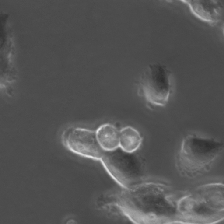

In [52]:
new_image = image.load_img('/content/gdrive/My Drive/Google Colab Folder/TNT_Project/sliced_unlabeled_images/IMG_1024_1024_tnt_1.png', target_size = (224, 224))
new_image

In [53]:
new_image = image.img_to_array(new_image)

new_image = np.expand_dims(new_image, axis = 0)
# reshape data for the model
#transformed_image = transformed_image.reshape((1, transformed_image.shape[0], transformed_image.shape[1], transformed_image.shape[2]))

result = tnt_model.predict(new_image)

1/1 [==============================] - 1s 632ms/step


In [54]:
if result[0][0] > 0.5:

    prediction = 'TNT'

else:

    prediction = 'No TNT'

print(prediction)

TNT
